<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'> Feature Scaling</h1>
</div>

© Copyright Machine Learning Plus

Scaling is the feature engineering technique to standardize the features in a fixed range or fixed property. It is generally used when the values in various features are varying too much.

## Content:
- Standardization Scaling
- Robust Scaling
- Normalization or Min-Max Scaling

#### Import the Wine Quality Data

In [1]:
# import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Datasets/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


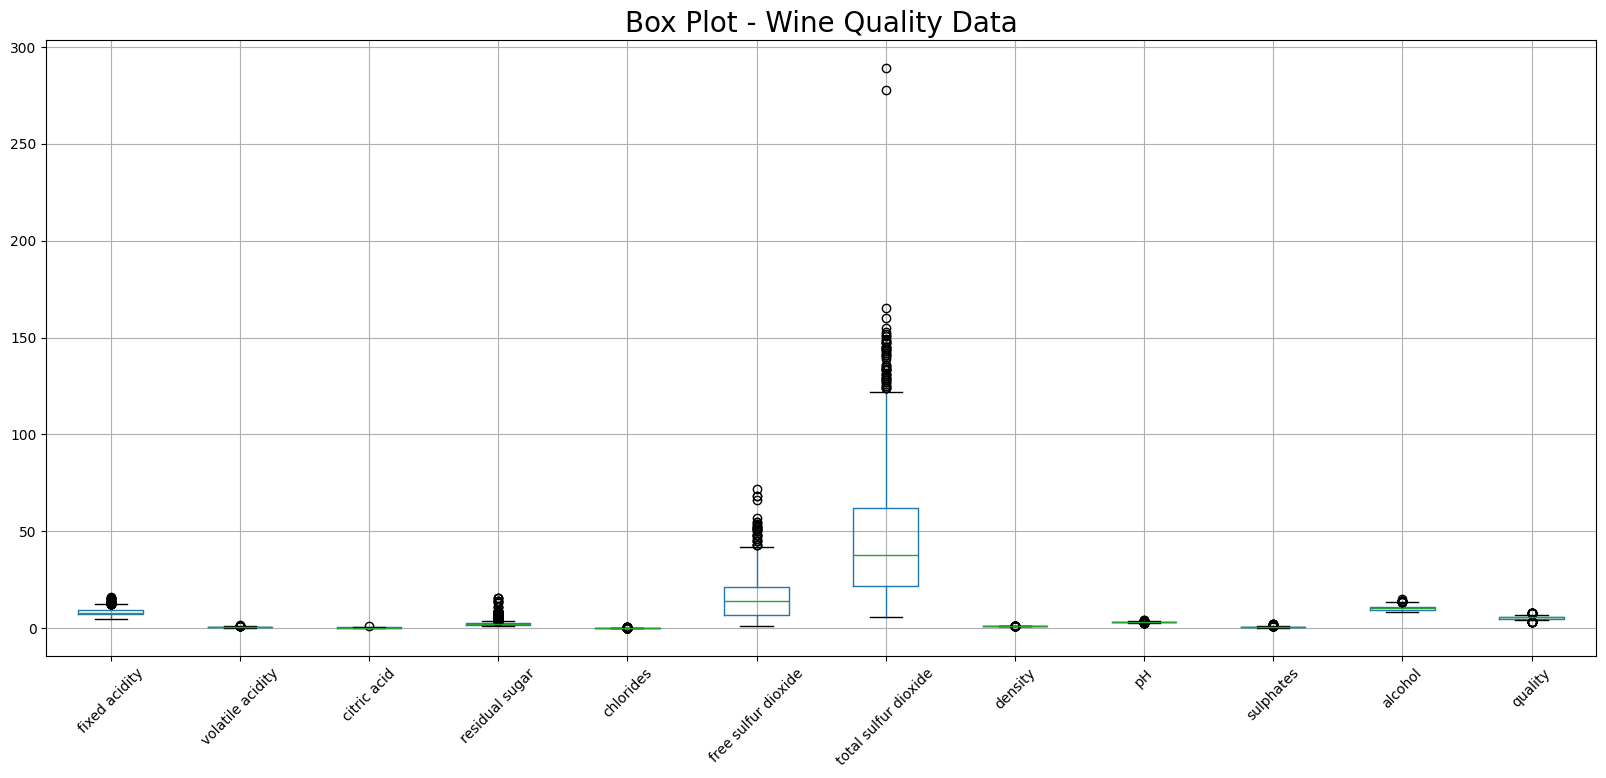

In [4]:
# Boxplot
plt.figure(figsize = [20,8])
df.boxplot()
plt.title('Box Plot - Wine Quality Data', fontsize = 20)
plt.xticks(rotation=45);

Let's fix the limint of y axis upto 100. 

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

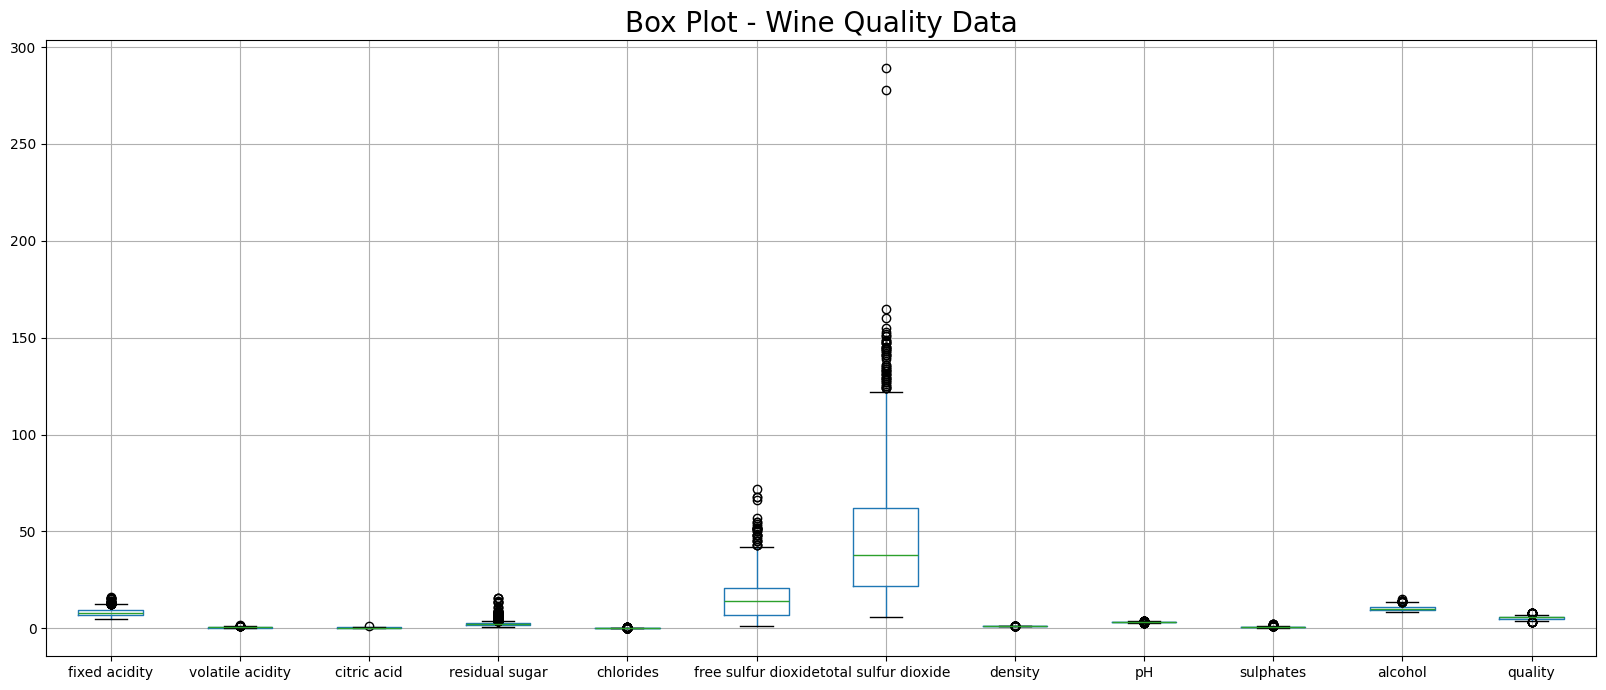

In [5]:
# Boxplot 
plt.figure(figsize = [20,8])
df.boxplot()
plt.title('Box Plot - Wine Quality Data', fontsize = 20)
plt.grid(b=None)
plt.ylim(-10, 100)
plt.xticks(rotation=45);

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Standardization</h2>
</div>

Standardization is the most popular scaling technique which rescales the feature value in a way that the distribution has the mean as 0 and the variance as 1.

$$Xscaled = (Xold - Xmean) / std_x$$

#### Standardization from scratch

In [6]:
# mean and standard deviation of fixed acidity

mean_value = df['fixed acidity'].mean()
print("Mean : ", mean_value)

std_value = df['fixed acidity'].std()
print("Standard Deviation : ", std_value)

Mean :  8.31963727329581
Standard Deviation :  1.7410963181276953


In [7]:
# Standardization
fixed_acidity_standardized = (df['fixed acidity'] - mean_value)/std_value

In [8]:
# mean and standard deviation after standardizing

print("Mean : ", fixed_acidity_standardized.mean())
print("Standard Deviation : ", fixed_acidity_standardized.std())

Mean :  3.554935513496436e-16
Standard Deviation :  1.0


Mean of the standardized feature is 0 and the standard deviation is 1

#### Standardization using `StandardScaler` function from sklearn

In [9]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [10]:
# Standardization
fixed_acidity_standardized = scaler.fit_transform(df['fixed acidity'].values.reshape(-1, 1))

In [11]:
# mean and standard deviation after standardizing

print("Mean : ", fixed_acidity_standardized.mean())
print("Standard Deviation : ", fixed_acidity_standardized.std())

Mean :  3.554935513496436e-16
Standard Deviation :  1.0


Mean of the standardized feature is 0 and the standard deviation is 1

Text(0.5, 1.0, 'Dist Plot - Standardized Data')

<Figure size 1200x800 with 0 Axes>

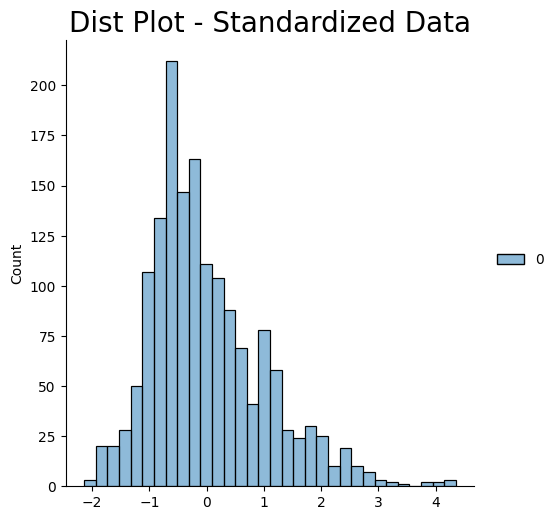

In [13]:
# Distribution Plot 
plt.figure(figsize = [12,8])
sns.displot(fixed_acidity_standardized)
plt.title('Dist Plot - Standardized Data', fontsize = 20)

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Robust Scaling</h2>
</div>

Robust Scaling is an important scaling technique which works very well when the data has outliers. But what's wrong with Standardization?

Standardization includes mean and standard deviation, both of these are prone to outliers. Hence it doesn't work very well in presence of outliers. To overcome this problem robust scaler uses median (measure of central tendency) and IQR (measuer of dispersion).

$$Xscaled = (Xold - Xmedian) / IQR$$

#### Robust Scaling from scratch

In [15]:
# median and IQR of fixed acidity

median_value = df['fixed acidity'].median()
print("Median Value: ", median_value)

q1 = np.percentile(df['fixed acidity'], 25, interpolation = 'midpoint') 
q3 = np.percentile(df['fixed acidity'], 75, interpolation = 'midpoint') 
IQR = q3 - q1 
print("Q1 Value: ", q1)
print("Q3 Value: ", q3)
print("IQR Value: ", IQR)

Median Value:  7.9
Q1 Value:  7.1
Q3 Value:  9.2
IQR Value:  2.0999999999999996


In [16]:
# Robust Scaling
fixed_acidity_robust = (df['fixed acidity'] - median_value)/IQR

In [17]:
# median and IQR after robust scaling

median_value = fixed_acidity_robust.median()
print("Median Value: ", median_value)

q1 = np.percentile(fixed_acidity_robust, 25, interpolation = 'midpoint') 
q3 = np.percentile(fixed_acidity_robust, 75, interpolation = 'midpoint') 
IQR = q3 - q1 
print("Q1 Value: ", q1)
print("Q3 Value: ", q3)
print("IQR Value: ", IQR)

Median Value:  0.0
Q1 Value:  -0.3809523809523814
Q3 Value:  0.6190476190476186
IQR Value:  1.0


#### Robust Scaling using `RobustScaler` function from sklearn

In [18]:
# Import RobustScaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

In [19]:
# Robust Scaling
fixed_acidity_robust = scaler.fit_transform(df['fixed acidity'].values.reshape(-1, 1))

In [20]:
# median and IQR after robust scaling

q1 = np.percentile(fixed_acidity_robust, 25, interpolation = 'midpoint') 
q2 = np.percentile(fixed_acidity_robust, 50, interpolation = 'midpoint') 
q3 = np.percentile(fixed_acidity_robust, 75, interpolation = 'midpoint') 

median_value = q2
print("Median Value: ", median_value)

IQR = q3 - q1 
print("Q1 Value: ", q1)
print("Q3 Value: ", q3)
print("IQR Value: ", IQR)

Median Value:  0.0
Q1 Value:  -0.3809523809523814
Q3 Value:  0.6190476190476186
IQR Value:  1.0


Text(0.5, 1.0, 'Dist Plot - Robust Scaled Data')

<Figure size 1200x800 with 0 Axes>

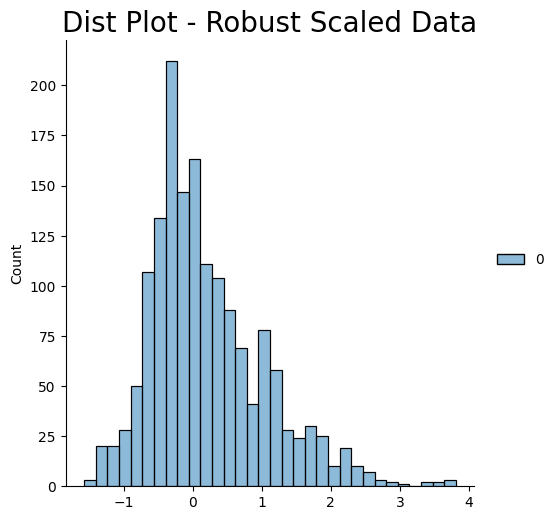

In [21]:
# Distribution Plot 
plt.figure(figsize = [12,8])
sns.displot(fixed_acidity_robust)
plt.title('Dist Plot - Robust Scaled Data', fontsize = 20)

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Normalization or Min-Max Scaling</h2>
</div>

Normalization (also known as min max scaling) is an important scaling technique which rescales the feature value in the range of 0 to 1.

$$Xscaled = (Xold - Xmin) / (Xmax - Xmin)$$

#### Min-Max Scaling from scratch

In [22]:
# min and max of fixed acidity

min_value = df['fixed acidity'].min()
print("Minimum Value : ", min_value)

max_value = df['fixed acidity'].max()
print("Maximum Value : ", max_value)

Minimum Value :  4.6
Maximum Value :  15.9


In [23]:
# Min-Max Scaling
fixed_acidity_minmax = (df['fixed acidity'] - min_value)/(max_value - min_value)

In [24]:
# mean and standard deviation after minmax scaling

print("Minimum : ", fixed_acidity_minmax.min())
print("Maximum : ", fixed_acidity_minmax.max())

print("Mean : ", fixed_acidity_minmax.mean())
print("Standard Deviation : ", fixed_acidity_minmax.std())

Minimum :  0.0
Maximum :  1.0
Mean :  0.3291714401146735
Standard Deviation :  0.15407932018829162


Minimum and maximum values of the scaled feature are 0 and 1 respectively

#### Min-Max Scaling using `MinMaxScaler` function from sklearn

In [25]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [26]:
# Min-Max Scaling
fixed_acidity_minmax = scaler.fit_transform(df['fixed acidity'].values.reshape(-1, 1))

In [27]:
# mean and standard deviation after minmax scaling

print("Minimum : ", fixed_acidity_minmax.min())
print("Maximum : ", fixed_acidity_minmax.max())

print("Mean : ", fixed_acidity_minmax.mean())
print("Standard Deviation : ", fixed_acidity_minmax.std())

Minimum :  0.0
Maximum :  1.0
Mean :  0.3291714401146735
Standard Deviation :  0.1540311327531215


Mean of the standardized feature is 0 and the standard deviation is 1

/var/folders/c0/864x3m2528sf2dfbw9r32jkm0000gn/T/ipykernel_36097/466853823.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fixed_acidity_minmax)


Text(0.5, 1.0, 'Dist Plot - Normalized Data')

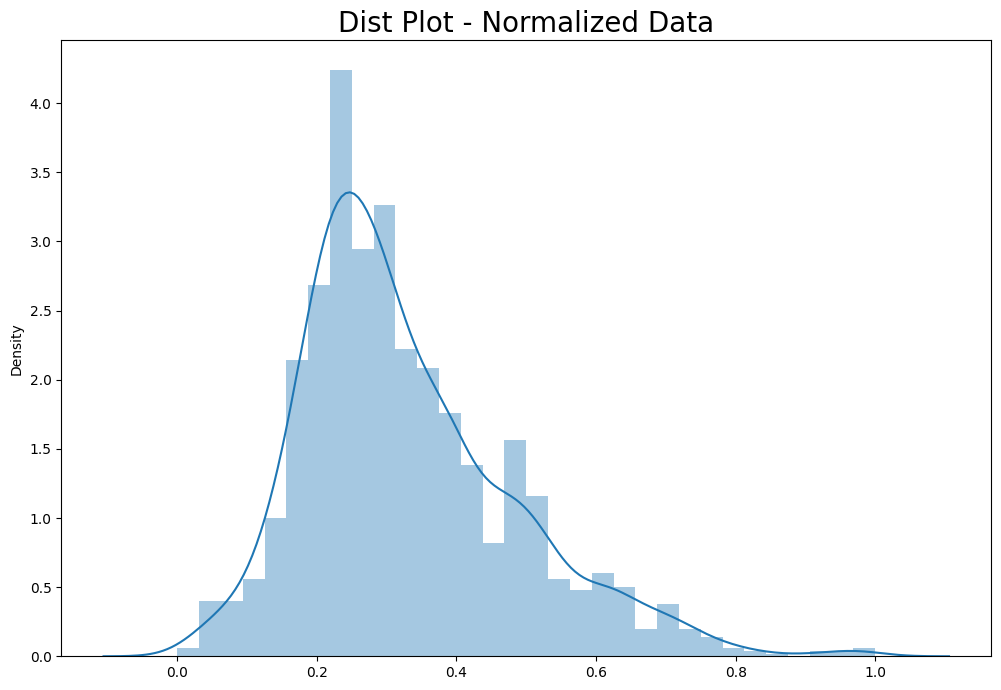

In [28]:
# Distribution Plot 
plt.figure(figsize = [12,8])
sns.distplot(fixed_acidity_minmax)
plt.title('Dist Plot - Normalized Data', fontsize = 20)

### Compare various scalers

In [29]:
# Create DataFrame
scaled_df = pd.DataFrame()
scaled_df['Raw'] = df['fixed acidity']
scaled_df['Standardized'] = fixed_acidity_standardized
scaled_df['Robust'] = fixed_acidity_robust
scaled_df['Normalized'] = fixed_acidity_minmax
scaled_df.head()

,Raw,Standardized,Robust,Normalized
0,7.4,-0.528360,-0.238095,0.247788
1,7.8,-0.298547,-0.047619,0.283186
2,7.8,-0.298547,-0.047619,0.283186
3,11.2,1.654856,1.571429,0.584071
4,7.4,-0.528360,-0.238095,0.247788


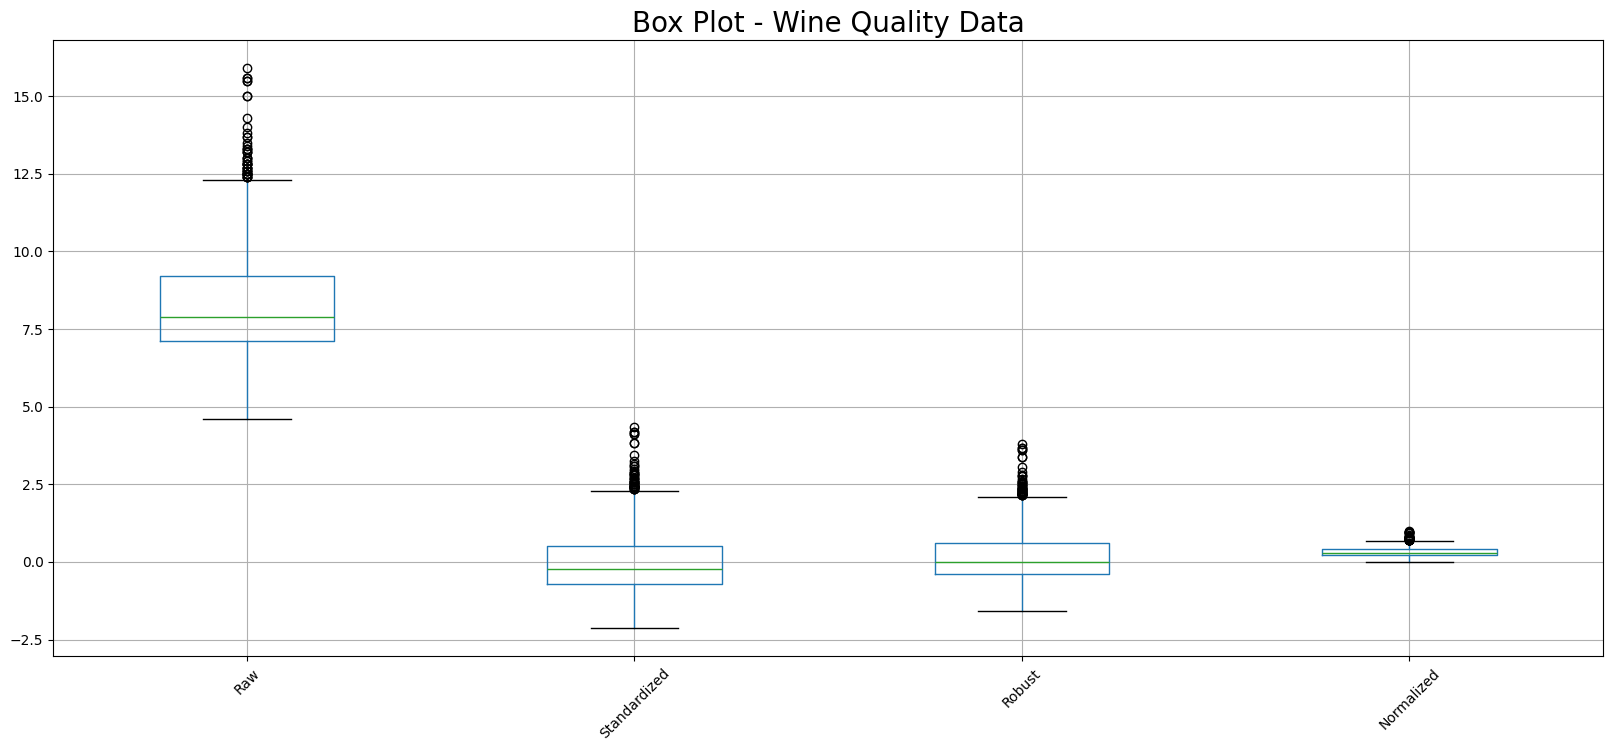

In [31]:
plt.figure(figsize = [20,8])
scaled_df.boxplot()
plt.title('Box Plot - Wine Quality Data', fontsize = 20)
plt.xticks(rotation=45);